author = The user who authored the review, providing valuable insights into the reviewer's identity and perspective.
date = The date when the review was submitted, offering a temporal dimension to the dataset and enabling time-based analysis.
address	= The geographical location from which the review was written, contributing to understanding regional trends and variations in banking experiences.
bank = The name of the reviewed bank, serving as a key identifier for the financial institution being assessed.
rating = The user's numerical assessment of the bank's service, indicating user satisfaction on a numerical scale.
review title by user = The user-assigned title to their review, summarizing the essence of their feedback in a concise manner.
review = The detailed content of the user's review about the bank, providing the primary textual data for analysis and insights.
bank image = The URL pointing to the bank's logo or image relevant to the review, facilitating visual associations with the bank.
rating title by user = The user-assigned title to their rating, potentially offering additional context to the rating value.
useful count = The count of users who found the review helpful, reflecting the impact and usefulness of the review among other users.

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import os
df = pd.read_csv("bank_reviews3.csv")

Pertama, kita akan melakukan data cleansing. Kita akan memeriksa berapa data yang kosong.

In [78]:
emptydata = df.isna().sum()
print(emptydata.to_string())
print("Persentase data yang kosong adalah", emptydata.sum()/(len(df.axes[0]) + len(df.axes[1])) * 100, "%")

author                  4
date                    0
address                 0
bank                    0
rating                  0
review_title_by_user    0
review                  0
bank_image              0
rating_title_by_user    0
useful_count            0
Persentase data yang kosong adalah 0.39603960396039606 %


Kita dapat bahwa kolom "author" memiliki 4 data yang kosong. Kita bisa dapat memperbaiki dengan beberapa cara, yakni dengan mengisi data yang kosong tersebut, menghapus kolom "author", atau menghapus row dimana data "author" tersebut kosong. Kami memutuskan untuk menghapus row dimana data "author" tersebut kosong. Mengisi data tersebut sendiri bisa menyebabkan komplikasi dengan data di kolom "author" yang lainnya. Kami masih ingin menggunakan kolom "author" sehingga kami gunakan pilihan terakhir yakni menghapus row dimana data "author" tersebut kosong. Jumlah data yang kosong pun sedikit sehingga pengaruhnya tidak besar.

In [79]:
df.dropna(axis=0,inplace=True)

In [80]:
df

,author,date,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count
0,AMRENDRA T,"Mar 21, 2020",New delhi,SBI,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,https://static.bankbazaar.com/images/common/ba...,Great!,133
1,BISHWA,"Mar 20, 2020",Kolkata,SBI,5.0,"""Good service""","I have my salary account in SBI, when I applie...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,89
2,SANTOSH,"Mar 20, 2020",Hooghly,Axis Bank,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,48
3,MAHADEV,"Mar 20, 2020",Pune,HDFC Bank,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,52
4,R,"Mar 20, 2020",Bangalore,review,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,22
...,...,...,...,...,...,...,...,...,...,...
995,A L,"Nov 26, 2019",Ernakulam,review,3.5,"""Good network of ATM""",I am holding a saving account with FEDERAL ban...,https://static.bankbazaar.com/images/common/ba...,Pretty good,3
996,A L,"Nov 26, 2019",Ernakulam,Axis Bank,4.0,"""Mobile app is good""",There is no mandatory balance to keep in my Ax...,https://static.bankbazaar.com/images/common/ba...,Great!,0
997,ANONYMS,"Nov 26, 2019",Bangalore,Axis Bank,4.0,"""Unhappy with the charges""","In Axis bank, every month they are charging me...",https://static.bankbazaar.com/images/common/ba...,Great!,0
998,SAJJANOJU,"Nov 26, 2019",Hyderabad,Axis Bank,5.0,"""Good Bank""",I have a salary account with AXIS bank and I h...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,0


Perhatikan bahwa di kolom "bank" terdapat data yang bertuliskan "review". Setelah diselidiki, "review" ini tidak merujuk pada bank apapun. Oleh karena itu, kami memutuskan untuk menghapus row yang kolom "bank" nya berisi "review.

In [81]:
df.drop(df.loc[df['bank'] == "review"].index, inplace=True)

Persentase data yang kosong untuk setiap atribut

In [82]:
print((emptydata /(len(df.axes[0]) + len(df.axes[1])) * 100).to_string())

author                  0.55325
date                    0.00000
address                 0.00000
bank                    0.00000
rating                  0.00000
review_title_by_user    0.00000
review                  0.00000
bank_image              0.00000
rating_title_by_user    0.00000
useful_count            0.00000


Untuk memudahkan kita dalam mengolah data, kita dapat memisahkan kolom "date" menjadi kolom "date", "month", dan "year".

In [83]:
df["date"] = pd.to_datetime(df["date"], format="%b %d, %Y")
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
year = df.pop('year')
month = df.pop('month')
day = df.pop('day')
df.insert(2, 'year', year)
df.insert(3, 'month', month)
df.insert(4, 'day', day)

In [84]:
df

,author,date,year,month,day,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count
0,AMRENDRA T,2020-03-21,2020,3,21,New delhi,SBI,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,https://static.bankbazaar.com/images/common/ba...,Great!,133
1,BISHWA,2020-03-20,2020,3,20,Kolkata,SBI,5.0,"""Good service""","I have my salary account in SBI, when I applie...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,89
2,SANTOSH,2020-03-20,2020,3,20,Hooghly,Axis Bank,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,48
3,MAHADEV,2020-03-20,2020,3,20,Pune,HDFC Bank,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,52
5,MD,2020-03-20,2020,3,20,Hyderabad,IDBI,5.0,"""Good """,I am not getting an alert message from IDBI ba...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,ANONYMS,2019-11-26,2019,11,26,Bangalore,SBI,4.0,"""Process has to be fast""","If any account to be activated in SBI, they ar...",https://static.bankbazaar.com/images/common/ba...,Great!,0
991,M,2019-11-26,2019,11,26,Bangalore,Punjab National Bank,4.0,"""Good """,I am holding a savings account with PUNJAB NAT...,https://static.bankbazaar.com/images/common/ba...,Great!,0
996,A L,2019-11-26,2019,11,26,Ernakulam,Axis Bank,4.0,"""Mobile app is good""",There is no mandatory balance to keep in my Ax...,https://static.bankbazaar.com/images/common/ba...,Great!,0
997,ANONYMS,2019-11-26,2019,11,26,Bangalore,Axis Bank,4.0,"""Unhappy with the charges""","In Axis bank, every month they are charging me...",https://static.bankbazaar.com/images/common/ba...,Great!,0


Sekarang kita cari panjang, dimensi, dan ukuran file data.

In [85]:
print("Panjang data adalah", len(df))
print("Dimensi data adalah {}".format(df.shape))
print("Ukuran file data adalah ", os.stat("bank_reviews3.csv").st_size, "Byte", "atau", os.stat("bank_reviews3.csv").st_size / 1024, "KiloByte")

Panjang data adalah 713
Dimensi data adalah (713, 13)
Ukuran file data adalah  464362 Byte atau 453.478515625 KiloByte


List semua "author"

In [86]:
print(df["author"].unique())

['AMRENDRA  T' 'BISHWA' 'SANTOSH' 'MAHADEV' 'MD' 'DINESH K V' 'D' 'N' 'U'
 'UN' 'AK' 'HI' 'V' 'NAR' 'R  PRASANNA' 'MUN' 'JHA' 'RA' 'AY'
 'AKSHAY  JAIN' 'K' 'ANONYMOUS' 'SHAN' 'GA' 'PRAD' 'KUMAR' 'M' 'S' 'G V N'
 'SHAILESH  P' 'A  DAS' 'G H' 'M S K' 'T PRAKASH' 'SM' 'B G H' 'Aarti'
 'YADAV' 'YAD' 'AR' 'LOGANAT' 'KA' 'M A' 'M H V' 'V   ANDEY' 'P B'
 'KENDRA' 'AJI' 'V T' 'SAM' 'SH' 'MOHA' 'K K C' 'V K' 'VI' 'VISH' 'S S'
 'SUMAN' 'NATHAN' 'ARUMAI' 'MURI' 'KESAVAN' 'PADAGA' 'KAPIL  KUMAR'
 'R  RAVEENDRAN' 'DAS' 'BALAJI' 'RANI' 'ANUGU' 'NUTULAPATI' 'Y   SURYA'
 'JANGAM' 'S G' 'G GODDETI' 'E' 'P K' 'P' 'P  BOYA' 'S D' 'K  VERMA'
 'S  MU' 'A MANU' 'AKHTER' 'Riyaz Ahmad' 'EN' 'S JENI' 'A' 'A R' 'DAL'
 'HM' 'J S T' 'MANTUNATHA' 'MAYUR SHIVAJI KADAM' 'A  C' 'KASALA' 'BHANU'
 'ARIF AHMED' 'harsh' 'WA' 'SHI' 'YARRI  SWAMY' 'YARRI'
 'BISWAJYOTI  CHAKRABORTY' 'B' 'AAMIR  ALI' 'JA' 'JANI B' 'J' 'MOHIT'
 'M KHARE' 'THIRUNAVU' 'MAR' 'C MONDAL' 'G  BHIMA' 'ANGELINE' 'Vicky'
 'RAJAPANDIYAN' 'PALLY' 'VAM' 

List setiap hari, bulan, dan tahun yang muncul pada dataset.

In [87]:
print(df["year"].sort_values().unique())
print(df["month"].sort_values().unique())
print(df["day"].sort_values().unique())

[2019 2020]
[ 1  2  3 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


Data ini dikumpulkan dari tahun 2020 hingga 2020. Review cenderung disubmit pada awal dan akhir tahun.

List tiap address tempat review disubmit.

In [88]:
print(df["address"].unique())

['New delhi' 'Kolkata' 'Hooghly' 'Pune' 'Hyderabad' 'Bangalore' 'Chennai'
 'Darbhanga' 'Jaipur' 'Chandigarh' 'Mumbai' 'Medak' 'Indore' 'Panipat'
 'Kanchipuram' 'Vijayawada' 'Moradabad' 'Kochi' 'Rangareddy' 'Jammu'
 'Aurangabad' 'Tirunelveli' 'Ludhiana' 'Anantnag' 'Madurai' 'Ahmedabad'
 'Allahabad' 'Gadag' 'Mangalore' 'Vadodara' 'Udhampur' 'Jamshedpur'
 'Noida' 'Surat' 'Ghaziabad' 'Visakhapatnam' 'Coimbatore' 'Chittorgarh'
 'Srikakulam' 'Meerut' 'Pondicherry' 'Dindigul' 'Thane' 'Tirupur'
 'Tinsukia' 'Rajahmundry' 'Tiruchirapalli' 'Delhi' 'Salem' 'Krishnagiri'
 'Chittoor' 'Warangal' 'Thrissur' 'Gandhinagar' 'Shillong' 'Raipur'
 'Palwal' 'Raichur' 'Nellore' 'Guntur' 'Tuticorin' 'Bareilly' 'Faridabad'
 'Bhopal' 'Hosur' 'Kanpur' 'Disabled keonjhar' 'Alleppey' 'Namakkal'
 'Navi mumbai' 'Hindupur' 'Mohali' 'Hubli' 'Haridwar' 'Thanjavur'
 'Thiruvananthapuram' 'Lucknow' 'Agartala' 'Kota' 'Jodhpur' 'Nagpur'
 'Karnal' 'Vizianagaram' 'Gurgaon' 'Agra' 'Kolhapur' 'Kalaburagi'
 'Chikballapura' 'Dehra

Daerah yang ditunjukkan ini menunjukkan nama kota-kota di India. Bisa jadi ini adalah data review bank di India

List tiap nama bank

In [89]:
print(df["bank"].unique())

['SBI' 'Axis Bank' 'HDFC Bank' 'IDBI' 'Kotak' 'IndusInd Bank'
 'Canara Bank' 'Citibank' 'Punjab National Bank']


List tiap rating

In [90]:
print(df["rating"].sort_values().unique())
print(df["rating_title_by_user"].unique())

[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
['Great!' 'Blown Away!' 'Excellent!' 'Satisfactory' 'Unacceptable'
 'Expected more' 'Bad' 'Pretty good' 'Really Bad' 'Just OK']


Rating bisa serendah 0.5 dan setinggi 5

Range dari useful count

In [91]:
minimumuseful = df['useful_count'].min()
maximumuseful = df['useful_count'].max()
print("Range useful count adalah", maximumuseful-minimumuseful)

Range useful count adalah 133


Range dari rating

In [92]:
minimumrating = df['rating'].min()
maximumrating = df['rating'].max()
print("Range rating adalah", maximumrating - minimumrating)

Range rating adalah 4.5


Rata-rata jumlah review yang diterima oleh survey setiap hari

In [93]:
print("Rata-rata jumlah review per hari adalah" ,df.groupby('date').size().mean())

Rata-rata jumlah review per hari adalah 6.4818181818181815


Jumlah nama "author" yang mensubmit review

In [94]:
print(df["author"].value_counts().to_string())

author
ANONYMOUS                   84
S                           18
ANONYMS                     13
KUMAR                       11
R                           10
A                            9
AR                           7
RAJ                          6
D                            5
S K                          5
SH                           5
M                            5
J                            5
Anonyms                      4
RA                           4
N S                          4
V                            4
RAJU                         3
DU                           3
G                            3
P K                          3
MAR                          3
MA                           3
PA                           3
KIRAN                        3
EN                           3
P                            3
B S                          2
AI                           2
B                            2
MURTHY                       2
MANTUNATHA                   2
A

Kita dapat melihat bahwa banyak "author" memilih untuk menjadi anonim. Tidak kalah dari itu, banyak juga yang menggunakan inisial saja.

Jumlah review yang disubmit tiap tahun

In [95]:
print(df["year"].value_counts().sort_index(ascending=True).to_string())

year
2019    230
2020    483


Kita dapat lihat bahwa submisi lebih banyak dilakukan pada tahun 2020 dibanding dengan 2019. Submisi pada tahun 2020 melebihi 2x submisi pada tahun 2019.

Jumlah submisi tiap bulan

In [96]:
print(df["month"].value_counts().to_string())

month
1     209
12    197
2     140
3     134
11     33


Submisi paling banyak dilakukan pada bulan Januari dan diikuti bulan Desember. Ini mendukung teori bahwa review banyak disubmit pada awal dan akhir bulan.

Jumlah review tiap hari

In [97]:
print(df["day"].value_counts().to_string())

day
20    44
28    36
17    35
29    31
3     31
12    30
10    30
13    29
5     28
18    26
27    26
2     25
7     24
21    23
24    23
30    22
9     22
14    22
16    22
19    21
15    19
6     19
22    18
4     16
11    16
1     15
26    13
23    13
8     12
31    12
25    10


Jumlah submisi yang berasal dari tiap daerah

In [98]:
print(df["address"].value_counts().to_string())

address
Bangalore             170
Chennai               110
Hyderabad             105
Kolkata                41
New delhi              25
Pune                   23
Mumbai                 21
Coimbatore             20
Kochi                  11
Jaipur                 10
Ahmedabad               8
Tirupur                 6
Surat                   6
Noida                   5
Jamshedpur              5
Visakhapatnam           5
Navi mumbai             5
Madurai                 4
Bareilly                4
Warangal                4
Dindigul                4
Amalapuram              4
Moradabad               4
Tirunelveli             4
Thiruvananthapuram      3
Alleppey                3
Ghaziabad               3
Hubli                   3
Raichur                 3
Mohali                  3
Vizianagaram            2
Karnal                  2
Faridabad               2
Agartala                2
Gurgaon                 2
Guntur                  2
Ludhiana                2
Rajahmundry             2
Vija

Review paling banyak disubmisi dari daerah Bangalore.

Jumlah review untuk tiap bank

In [99]:
print(df["bank"].value_counts().to_string())

bank
SBI                     218
HDFC Bank               188
Axis Bank               130
Kotak                    80
Canara Bank              35
IndusInd Bank            20
IDBI                     14
Citibank                 14
Punjab National Bank     14


Dari data ini, ditunjukkan bahwa bank yang paling populer adalah bank SBI

In [100]:
ratingSBI = df["rating"].loc[df["bank"] == "SBI"].value_counts()
print(ratingSBI.sort_index(ascending=False).to_string())

rating
5.0    106
4.5      7
4.0     73
3.5      4
3.0     12
2.5      1
2.0     12
1.5      1
1.0      2


Jumlah rating tiap bank

In [101]:
ratingHDFC = df["rating"].loc[df["bank"] == "HDFC Bank"].value_counts()
print(ratingHDFC.sort_index(ascending=False).to_string())

rating
5.0    114
4.5     11
4.0     44
3.5      2
3.0     10
2.0      4
1.0      2
0.5      1


In [102]:
ratingAxis = df["rating"].loc[df["bank"] == "Axis Bank"].value_counts()
print(ratingAxis.sort_index(ascending=False).to_string())

rating
5.0    79
4.5     8
4.0    22
3.5     4
3.0    10
2.0     4
0.5     3


In [103]:
ratingKotak = df["rating"].loc[df["bank"] == "Kotak"].value_counts()
print(ratingKotak.sort_index(ascending=False).to_string())

rating
5.0    42
4.5     1
4.0    27
3.5     1
3.0     5
2.0     1
1.0     2
0.5     1


In [104]:
ratingCanara = df["rating"].loc[df["bank"] == "Canara Bank"].value_counts()
print(ratingCanara.sort_index(ascending=False).to_string())

rating
5.0    17
4.5     1
4.0    10
3.5     1
3.0     5
1.0     1


In [105]:
ratingIndusInd = df["rating"].loc[df["bank"] == "IndusInd Bank"].value_counts()
print(ratingIndusInd.sort_index(ascending=False).to_string())

rating
5.0    11
4.0     6
3.0     1
2.0     1
0.5     1


In [106]:
ratingIDBI = df["rating"].loc[df["bank"] == "IDBI"].value_counts()
print(ratingIDBI.sort_index(ascending=False).to_string())

rating
5.0    9
4.5    2
3.5    1
2.0    1
0.5    1


In [107]:
ratingCitibank = df["rating"].loc[df["bank"] == "Citibank"].value_counts()
print(ratingCitibank.sort_index(ascending=False).to_string())

rating
5.0    9
4.5    2
4.0    3


In [108]:
ratingPunjab = df["rating"].loc[df["bank"] == "Punjab National Bank"].value_counts()
print(ratingPunjab.sort_index(ascending=False).to_string())

rating
5.0    8
4.5    1
4.0    4
3.0    1


Jumlah rating yang diberi

In [109]:
print(df["rating_title_by_user"].value_counts().to_string())
print(df['rating'].value_counts().to_string())

rating_title_by_user
Blown Away!      395
Great!           189
Satisfactory      44
Excellent!        33
Expected more     23
Pretty good       13
Unacceptable       7
Really Bad         7
Bad                1
Just OK            1
rating
5.0    395
4.0    189
3.0     44
4.5     33
2.0     23
3.5     13
0.5      7
1.0      7
1.5      1
2.5      1


Kita melihat bahwa data keduanya jumlahnya identik. Kita dapat menyandingkan value "rating_title_by_user" dengan "rating"

Jumlah useful count untuk tiap bank

In [110]:
print(df.groupby("bank")["useful_count"].sum().sort_values(ascending = False).to_string())

bank
SBI                     533
HDFC Bank               351
Axis Bank               265
Kotak                   159
Canara Bank             110
IndusInd Bank           103
IDBI                     90
Punjab National Bank     53
Citibank                 31


Tampaknya bank SBI bukan hanya bank yang paling banyak direview, tetapi juga yang paling banyak diminati oleh calon pengguna. Nilai useful count yang tinggi ini menunjukkan bahwa banyak calon nasabah yang ingin menggunakan layanan bank SBI dan menggunakan internet untuk melihat rating yang diberikan oleh pengguna yang telah menggunakan layanan bank tersebut.

Percentil (10%, 20%, 50%, 75%, dan 90%), Rata-Rata, Standar Deviasi, Nilai Minimum, dan Nilai Maksimum Rating

In [111]:
print(df["rating"].quantile([0.1, 0.25, 0.5, 0.75, 0.9]).to_string())
print(df["rating"].mean())
print(df["rating"].std())
print(minimumrating)
print(maximumrating)

0.10    3.0
0.25    4.0
0.50    5.0
0.75    5.0
0.90    5.0
4.372370266479663
0.9186623872845218
0.5
5.0


Percentil (10%, 20%, 50%, 75%, dan 90%), Rata-Rata, Standar Deviasi, Nilai Minimum, dan Nilai Maksimum Useful Count

In [112]:
print(df["useful_count"].quantile([0.1, 0.25, 0.5, 0.75, 0.9]).to_string())
print(df["useful_count"].mean())
print(df["useful_count"].std())
print(minimumuseful)
print(maximumuseful)

0.10    0.0
0.25    0.0
0.50    0.0
0.75    1.0
0.90    5.0
2.377279102384292
8.376290100321468
0
133


In [113]:
df[["rating", "useful_count"]].describe()

,rating,useful_count
count,713.000000,713.000000
mean,4.372370,2.377279
std,0.918662,8.376290
min,0.500000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,1.000000
max,5.000000,133.000000


In [114]:
# Data pada tanggal 2019-11-26
df.loc[df["date"] == "2019-11-26"]

,author,date,year,month,day,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count
990,ANONYMS,2019-11-26,2019,11,26,Bangalore,SBI,4.0,"""Process has to be fast""","If any account to be activated in SBI, they ar...",https://static.bankbazaar.com/images/common/ba...,Great!,0
991,M,2019-11-26,2019,11,26,Bangalore,Punjab National Bank,4.0,"""Good """,I am holding a savings account with PUNJAB NAT...,https://static.bankbazaar.com/images/common/ba...,Great!,0
996,A L,2019-11-26,2019,11,26,Ernakulam,Axis Bank,4.0,"""Mobile app is good""",There is no mandatory balance to keep in my Ax...,https://static.bankbazaar.com/images/common/ba...,Great!,0
997,ANONYMS,2019-11-26,2019,11,26,Bangalore,Axis Bank,4.0,"""Unhappy with the charges""","In Axis bank, every month they are charging me...",https://static.bankbazaar.com/images/common/ba...,Great!,0
998,SAJJANOJU,2019-11-26,2019,11,26,Hyderabad,Axis Bank,5.0,"""Good Bank""",I have a salary account with AXIS bank and I h...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,0


In [115]:
# 10 author yang memberi review terbanyak
print(df["author"].value_counts().head(10).to_string())

author
ANONYMOUS    84
S            18
ANONYMS      13
KUMAR        11
R            10
A             9
AR            7
RAJ           6
D             5
S K           5


In [116]:
# Review yang memberi rating tertinggi
df.loc[df["rating"] == df["rating"].max()]

,author,date,year,month,day,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count
1,BISHWA,2020-03-20,2020,3,20,Kolkata,SBI,5.0,"""Good service""","I have my salary account in SBI, when I applie...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,89
2,SANTOSH,2020-03-20,2020,3,20,Hooghly,Axis Bank,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,48
3,MAHADEV,2020-03-20,2020,3,20,Pune,HDFC Bank,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,52
5,MD,2020-03-20,2020,3,20,Hyderabad,IDBI,5.0,"""Good """,I am not getting an alert message from IDBI ba...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,37
7,D,2020-03-20,2020,3,20,Bangalore,Kotak,5.0,"""Good service""","Its been 2 years, i am using Kotak Bank saving...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,VEENA,2019-11-27,2019,11,27,Bangalore,HDFC Bank,5.0,"""Best Service""",I am holding HDFC Bank salary account for past...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,0
984,S,2019-11-27,2019,11,27,Coimbatore,HDFC Bank,5.0,"""Excellent service""",I have a saving account with HDFC bank for pas...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,0
985,GOVARDHAN,2019-11-27,2019,11,27,Hyderabad,Axis Bank,5.0,"""Best bank""",I am using AXIS bank saving account since 2015...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,0
989,PRAKASH,2019-11-27,2019,11,27,Coimbatore,HDFC Bank,5.0,"""Good saving account""",I have an account with an HDFC BANK for the pa...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,0


In [117]:
# Review yang memberi rating tertinggi
df.loc[df["rating"]==df["rating"].min()]

,author,date,year,month,day,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count
74,Aarti,2020-03-12,2020,3,12,Mumbai,Axis Bank,0.5,"""Bad Customer support""",Axis bank has limited options in menu of Custo...,https://static.bankbazaar.com/images/common/ba...,Unacceptable,29
192,harsh,2020-03-01,2020,3,1,Udhampur,HDFC Bank,0.5,"""worst service """,I opened a saving account with them a long tim...,https://static.bankbazaar.com/images/common/ba...,Unacceptable,7
229,Vicky,2020-02-25,2020,2,25,Bangalore,Axis Bank,0.5,"""Worst Customer support at Cox town branch """,Need a lot of improvement in guiding a custome...,https://static.bankbazaar.com/images/common/ba...,Unacceptable,8
281,Devansh Agarwal,2020-02-19,2020,2,19,Meerut,Axis Bank,0.5,"""Debit freeze""",I have an Axis ASAP account. It was blocked on...,https://static.bankbazaar.com/images/common/ba...,Unacceptable,7
376,shailendra pushkar,2020-02-07,2020,2,7,New delhi,IDBI,0.5,"""idbi services""",Pathetic service by IDBI bank. bank have recen...,https://static.bankbazaar.com/images/common/ba...,Unacceptable,10
908,Gopal,2019-12-06,2019,12,6,Navi mumbai,Kotak,0.5,"""PLease do not open a bank account in KMB """,ready to cheat NRI's\r\nplease open any accoun...,https://static.bankbazaar.com/images/common/ba...,Unacceptable,5
912,Bheem,2019-12-05,2019,12,5,Hyderabad,IndusInd Bank,0.5,"""Worst NRE/NRI services by Indusland Bank""",worst service I ever seen in my life from Indu...,https://static.bankbazaar.com/images/common/ba...,Unacceptable,12


In [118]:
# Review oleh orang bernama KUMAR
df.loc[df["author"] == "KUMAR"]

,author,date,year,month,day,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count
38,KUMAR,2020-03-17,2020,3,17,Hyderabad,HDFC Bank,5.0,"""Good """,I maintain my salary cum saving account with H...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,12
360,KUMAR,2020-02-12,2020,2,12,Surat,SBI,5.0,"""Need to improve service""",I maintain a saving account with SBI for more ...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,0
378,KUMAR,2020-02-06,2020,2,6,Warangal,SBI,5.0,"""Need to decrease interest charge """,I am holding a salary account with SBI more t...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,1
480,KUMAR,2020-01-23,2020,1,23,Chennai,Axis Bank,4.0,"""Good service""",I am using AXIS BANK salary account for more t...,https://static.bankbazaar.com/images/common/ba...,Great!,0
677,KUMAR,2020-01-02,2020,1,2,Bangalore,Canara Bank,4.0,"""Good bank """,I am holding saving account with CANARA bank f...,https://static.bankbazaar.com/images/common/ba...,Great!,0
719,KUMAR,2019-12-28,2019,12,28,Chennai,Axis Bank,5.0,"""Good account """,I am holding a salary account with AXIS bank ...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,0
812,KUMAR,2019-12-18,2019,12,18,Chennai,HDFC Bank,4.0,"""Good service""",I am holding the salary account with HDFC ban...,https://static.bankbazaar.com/images/common/ba...,Great!,1
833,KUMAR,2019-12-14,2019,12,14,Hyderabad,HDFC Bank,5.0,"""Need to decrease charges""",I am holding a saving account with HDFC bank ...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,0
870,KUMAR,2019-12-11,2019,12,11,Bangalore,Canara Bank,5.0,"""Service is better""",My previous savings account in Canara bank and...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,1
901,KUMAR,2019-12-07,2019,12,7,Chennai,Kotak,5.0,"""Good Account""",I'm having my savings account with Kotak mahin...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,1


In [119]:
# 5 review dengan useful count terbanyak
df.sort_values(by="useful_count",ascending=False).head(5)

,author,date,year,month,day,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count
0,AMRENDRA T,2020-03-21,2020,3,21,New delhi,SBI,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,https://static.bankbazaar.com/images/common/ba...,Great!,133
1,BISHWA,2020-03-20,2020,3,20,Kolkata,SBI,5.0,"""Good service""","I have my salary account in SBI, when I applie...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,89
3,MAHADEV,2020-03-20,2020,3,20,Pune,HDFC Bank,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,52
6,DINESH K V,2020-03-20,2020,3,20,Bangalore,SBI,4.0,"""Good account""",I am using savings account from SBI more than ...,https://static.bankbazaar.com/images/common/ba...,Great!,52
2,SANTOSH,2020-03-20,2020,3,20,Hooghly,Axis Bank,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,48


In [120]:
# Review untuk SBI dengan rating title Blown Away!
df.loc[(df["bank"]=="SBI") & (df['rating_title_by_user'] == "Blown Away!")]

,author,date,year,month,day,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count
1,BISHWA,2020-03-20,2020,3,20,Kolkata,SBI,5.0,"""Good service""","I have my salary account in SBI, when I applie...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,89
11,AK,2020-03-19,2020,3,19,Bangalore,SBI,5.0,"""Great""",My mother has suggested SBI to open a saving a...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,43
20,MUN,2020-03-19,2020,3,19,Hyderabad,SBI,5.0,"""Need to provide more offers""",I maintain salary cum saving account with SBI....,https://static.bankbazaar.com/images/common/ba...,Blown Away!,17
45,S,2020-03-16,2020,3,16,Chennai,SBI,5.0,"""Best savings account""","SBI has a very good application, since i am us...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,16
52,S,2020-03-15,2020,3,15,Bangalore,SBI,5.0,"""Best account""",I have been holding an account for a saving wi...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,M,2019-12-07,2019,12,7,Chennai,SBI,5.0,"""Best savings account""",I am using savings account in SBI almost 3 yea...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,0
914,REMA,2019-12-05,2019,12,5,Thiruvananthapuram,SBI,5.0,"""Good Service""",I have State Bank Of India saving account for ...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,1
934,BILLA,2019-12-04,2019,12,4,Amalapuram,SBI,5.0,"""Largest bank in India""",SBI is a very good bank because it provides me...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,0
959,GANDU,2019-11-30,2019,11,30,Hyderabad,SBI,5.0,"""Good Service""",I have state Bank Of India salary account for ...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,0


In [121]:
# Review di address Amalapuram dan rating title Expected more
df.loc[(df["address"]=="Amalapuram") & (df['rating_title_by_user'] == "Expected more")]

,author,date,year,month,day,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count
932,S P B,2019-12-04,2019,12,4,Amalapuram,HDFC Bank,2.0,"""Charges are high""",HDFC bank is charging very high hence i won't ...,https://static.bankbazaar.com/images/common/ba...,Expected more,1


In [122]:
# Review pada tahun 2019 dan bulan 11
df.loc[(df["year"] == 2019) & (df["month"] == 11)]

,author,date,year,month,day,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count
957,GH,2019-11-30,2019,11,30,Bangalore,Axis Bank,5.0,"""Good Service""",I have been holding Axis Bank salary account f...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,0
958,THAKUR,2019-11-30,2019,11,30,Bangalore,Axis Bank,5.0,"""Good Service""",I am using Axis Bank saving account for the pa...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,0
959,GANDU,2019-11-30,2019,11,30,Hyderabad,SBI,5.0,"""Good Service""",I have state Bank Of India salary account for ...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,0
960,LALIT,2019-11-30,2019,11,30,Pune,HDFC Bank,4.0,"""Excellent Service""",I am using HDFC Bank salary account for the pa...,https://static.bankbazaar.com/images/common/ba...,Great!,1
961,SHELAR,2019-11-30,2019,11,30,Dhule,Axis Bank,5.0,"""Excellent Service""",I am having Axis Bank saving account which I a...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,0
962,MEENA,2019-11-30,2019,11,30,Jaipur,SBI,3.0,"""Good Service""",I am using State Bank Of India saving account ...,https://static.bankbazaar.com/images/common/ba...,Satisfactory,0
963,PRADEEP,2019-11-29,2019,11,29,Vijayawada,HDFC Bank,4.0,"""Excellent service""",I hold the salary account with HDFC BANK for m...,https://static.bankbazaar.com/images/common/ba...,Great!,2
964,BABULAL,2019-11-29,2019,11,29,Haveri,SBI,4.0,"""Best savings account""",I have been holding an account for a saving wi...,https://static.bankbazaar.com/images/common/ba...,Great!,1
965,SA,2019-11-29,2019,11,29,Bareilly,Axis Bank,3.0,"""Need to reduce interest rate """,I am having a saving account with AXIS BANK fo...,https://static.bankbazaar.com/images/common/ba...,Satisfactory,1
966,YAM,2019-11-29,2019,11,29,Bareilly,Punjab National Bank,5.0,"""Good Service""",I am holding saving account with PUNJAB NATION...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,5


In [123]:
# Review ke bank HDFC dan rating 4.0
df.loc[(df["bank"]=="HDFC Bank") & (df['rating'] == 4.0)]

,author,date,year,month,day,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count
19,R PRASANNA,2020-03-19,2020,3,19,Chennai,HDFC Bank,4.0,"""Best Service""",I have Hdfc bank salary account for the past 3...,https://static.bankbazaar.com/images/common/ba...,Great!,24
25,AKSHAY JAIN,2020-03-18,2020,3,18,Jaipur,HDFC Bank,4.0,"""Good account """,I am holding salary account with HDFC Bank for...,https://static.bankbazaar.com/images/common/ba...,Great!,9
110,V K,2020-03-10,2020,3,10,Hyderabad,HDFC Bank,4.0,"""Flexible to use""","10 years ago, i have opened the salary account...",https://static.bankbazaar.com/images/common/ba...,Great!,0
111,ANONYMOUS,2020-03-10,2020,3,10,Mumbai,HDFC Bank,4.0,"""Good internet banking""",I have opened the salary account about 6 years...,https://static.bankbazaar.com/images/common/ba...,Great!,0
141,ANUGU,2020-03-05,2020,3,5,Rangareddy,HDFC Bank,4.0,"""Average Account""",I am using my salary account from HDFC bank fo...,https://static.bankbazaar.com/images/common/ba...,Great!,0
168,EN,2020-03-02,2020,3,2,Madurai,HDFC Bank,4.0,"""Good bank for getting more loan offers ""","I get my salary in HDFC account, hence holding...",https://static.bankbazaar.com/images/common/ba...,Great!,0
173,ANONYMOUS,2020-03-02,2020,3,2,Ahmedabad,HDFC Bank,4.0,"""Good Account""","In my HDFC salary account, they are charging R...",https://static.bankbazaar.com/images/common/ba...,Great!,1
202,A,2020-02-28,2020,2,28,Kolkata,HDFC Bank,4.0,"""Good service""","From HDFC Bank, i have an account and i am usi...",https://static.bankbazaar.com/images/common/ba...,Great!,0
210,J,2020-02-28,2020,2,28,Bangalore,HDFC Bank,4.0,"""Best application""",I am doing all my transactions through HDFC Ba...,https://static.bankbazaar.com/images/common/ba...,Great!,0
215,MOHIT,2020-02-27,2020,2,27,Noida,HDFC Bank,4.0,"""Good""",From HDFC Bank Internet banking and mobile ban...,https://static.bankbazaar.com/images/common/ba...,Great!,0


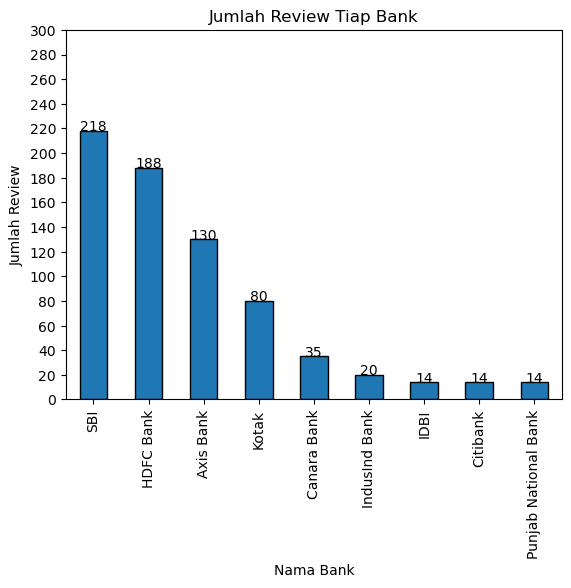

In [124]:
df["bank"].value_counts().plot(kind = "bar", xlabel="Nama Bank", ylabel="Jumlah Review", yticks = [i for i in range(0, 301, 20)], title = "Jumlah Review Tiap Bank", edgecolor = "black")
for index, value in enumerate(df["bank"].value_counts()):
    plt.text(index,value, str(value), ha = 'center')
plt.show()

Dari bar chart ini, kita dapat melihat bahwa review paling banyak didapat oleh bank SBI dengan 218 review sementara review paling sedikit didapat oleh IDBI, Citibank, dan Punjab National Bank dengan 14 review masing-masing.

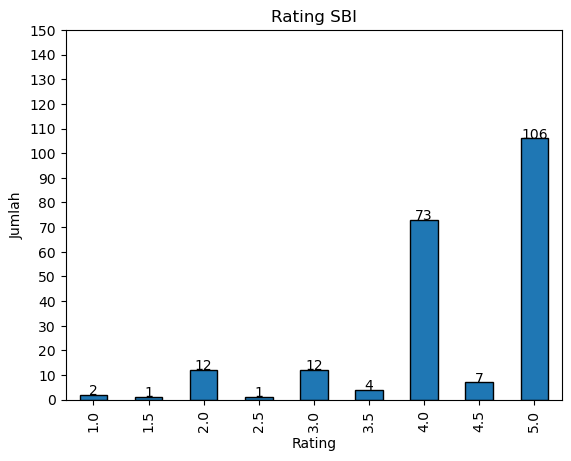

In [125]:
ratingSBI.sort_index(ascending = True).plot(kind = "bar", xlabel="Rating", ylabel="Jumlah", yticks = [i for i in range(0, 151, 10)], title = "Rating SBI", edgecolor = "black")
for index, value in enumerate(ratingSBI.sort_index(ascending = True)):
    plt.text(index,value, str(value), ha = 'center')
plt.show()

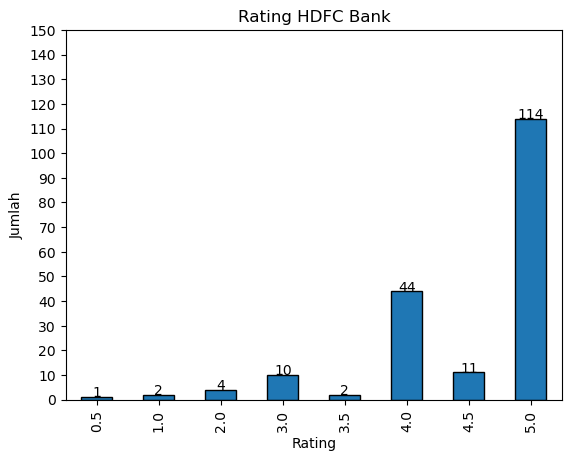

In [126]:
ratingHDFC.sort_index(ascending = True).plot(kind = "bar", xlabel="Rating", ylabel="Jumlah", yticks = [i for i in range(0, 151, 10)], title = "Rating HDFC Bank", edgecolor = "black")
for index, value in enumerate(ratingHDFC.sort_index(ascending = True)):
    plt.text(index,value, str(value), ha = 'center')
plt.show()

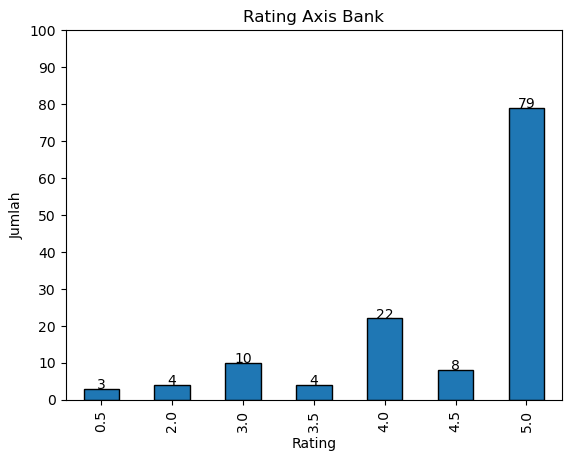

In [127]:
ratingAxis.sort_index(ascending = True).plot(kind = "bar", xlabel="Rating", ylabel="Jumlah", yticks = [i for i in range(0, 101, 10)], title = "Rating Axis Bank", edgecolor = "black")
for index, value in enumerate(ratingAxis.sort_index(ascending = True)):
    plt.text(index,value, str(value), ha = 'center')
plt.show()

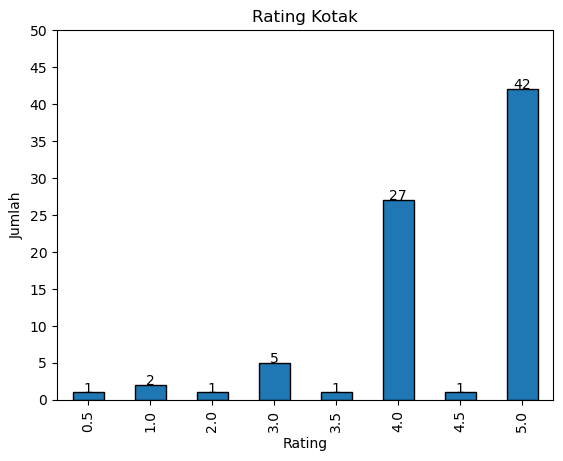

In [128]:
ratingKotak.sort_index(ascending = True).plot(kind = "bar", xlabel="Rating", ylabel="Jumlah", yticks = [i for i in range(0, 51, 5)], title = "Rating Kotak", edgecolor = "black")
for index, value in enumerate(ratingKotak.sort_index(ascending = True)):
    plt.text(index,value, str(value), ha = 'center')
plt.show()

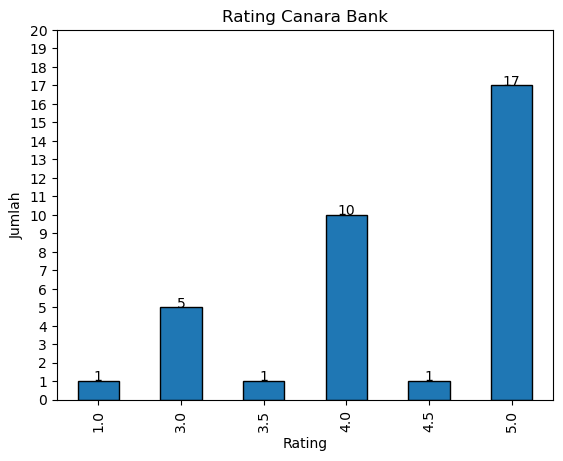

In [129]:
ratingCanara.sort_index(ascending = True).plot(kind = "bar", xlabel="Rating", ylabel="Jumlah", yticks = [i for i in range(0, 21, 1)], title = "Rating Canara Bank", edgecolor = "black")
for index, value in enumerate(ratingCanara.sort_index(ascending = True)):
    plt.text(index,value, str(value), ha = 'center')
plt.show()

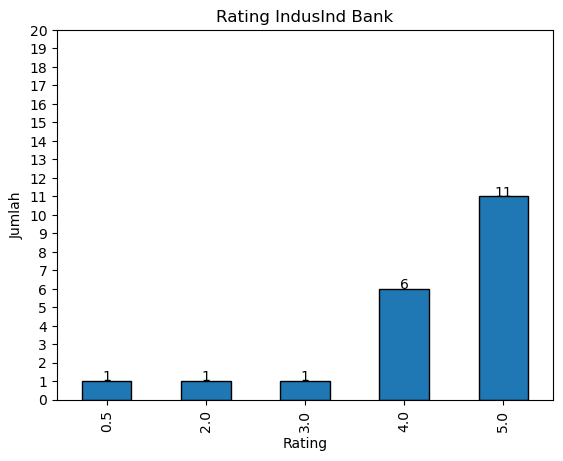

In [130]:
ratingIndusInd.sort_index(ascending = True).plot(kind = "bar", xlabel="Rating", ylabel="Jumlah", yticks = [i for i in range(0, 21, 1)], title = "Rating IndusInd Bank", edgecolor = "black")
for index, value in enumerate(ratingIndusInd.sort_index(ascending = True)):
    plt.text(index,value, str(value), ha = 'center')
plt.show()

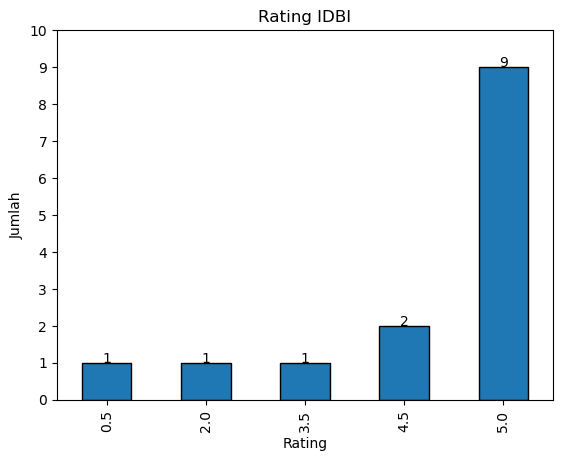

In [131]:
ratingIDBI.sort_index(ascending = True).plot(kind = "bar", xlabel="Rating", ylabel="Jumlah", yticks = [i for i in range(0, 11, 1)], title = "Rating IDBI", edgecolor = "black")
for index, value in enumerate(ratingIDBI.sort_index(ascending = True)):
    plt.text(index,value, str(value), ha = 'center')
plt.show()

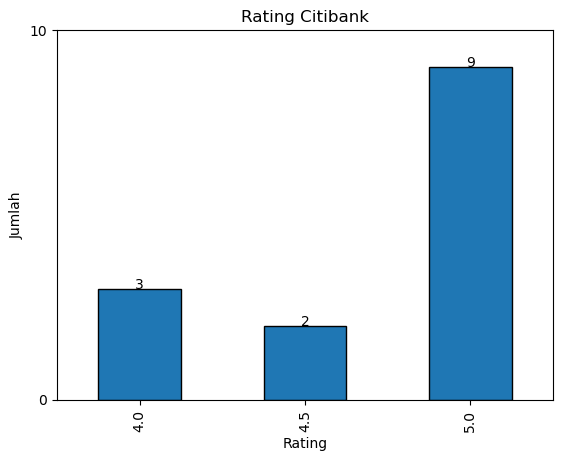

In [132]:
ratingCitibank.sort_index(ascending = True).plot(kind = "bar", xlabel="Rating", ylabel="Jumlah", yticks = [i for i in range(0, 11, 10)], title = "Rating Citibank", edgecolor = "black")
for index, value in enumerate(ratingCitibank.sort_index(ascending = True)):
    plt.text(index,value, str(value), ha = 'center')
plt.show()

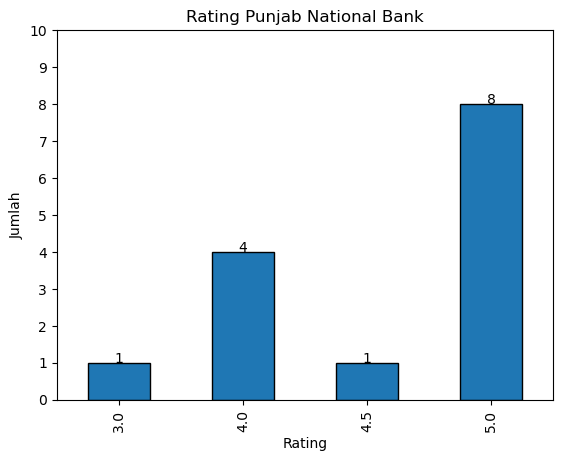

In [133]:
ratingPunjab.sort_index(ascending = True).plot(kind = "bar", xlabel="Rating", ylabel="Jumlah", yticks = [i for i in range(0, 11, 1)], title = "Rating Punjab National Bank", edgecolor = "black")
for index, value in enumerate(ratingPunjab.sort_index(ascending = True)):
    plt.text(index,value, str(value), ha = 'center')
plt.show()

Untuk setiap bank, mayoritas dari review bernilai positif dengan rating terbanyak tiap bank bernilai 5.0

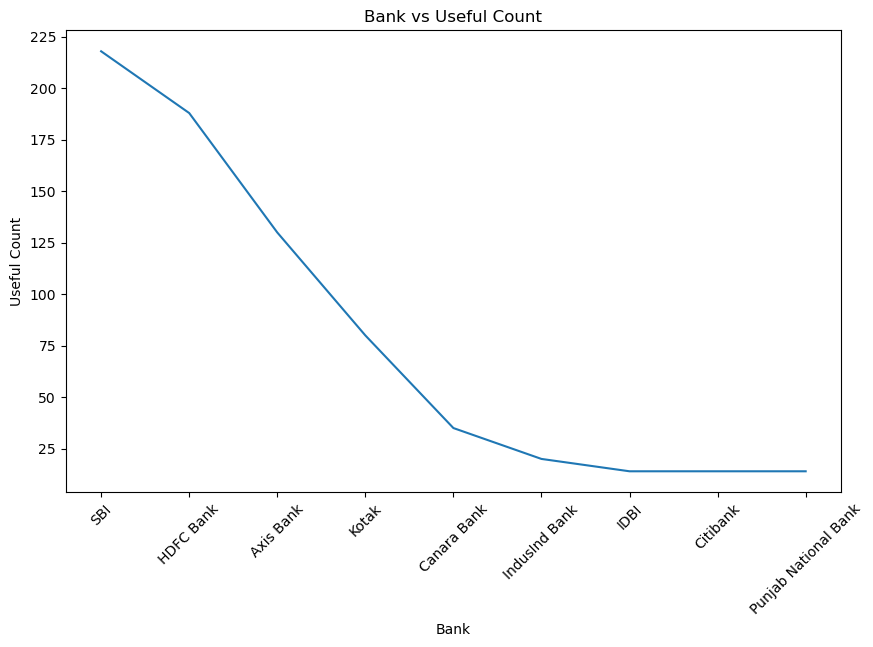

In [134]:
line_plot = df["bank"].value_counts().plot(kind="line", x="bank", y="useful_count", figsize=(10, 6))
line_plot.set_xlabel("Bank")
line_plot.set_ylabel("Useful Count")
line_plot.set_title("Bank vs Useful Count")
plt.xticks(rotation=45)
plt.show()

Bank SBI mendapat nilai useful count paling tinggi dibanding dengan bank lain.

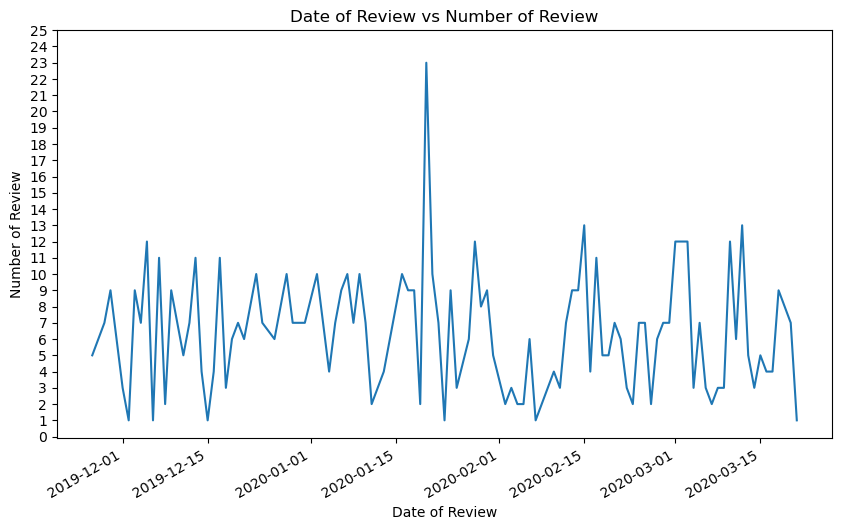

In [135]:
review_count_by_date = df.groupby('date').size()
line_plot = review_count_by_date.plot(kind="line", figsize=(10, 6))
line_plot.set_xlabel("Date of Review")
line_plot.set_ylabel("Number of Review")
line_plot.set_title("Date of Review vs Number of Review")
line_plot.set_yticks([i for i in range(0, 26, 1)])
plt.show()

Tabel ini menunjukkan jumlah review yang dilakukan per hari. Ini memuncak pada interval 15 Januari 2020 sampai 1 Februari 2020.

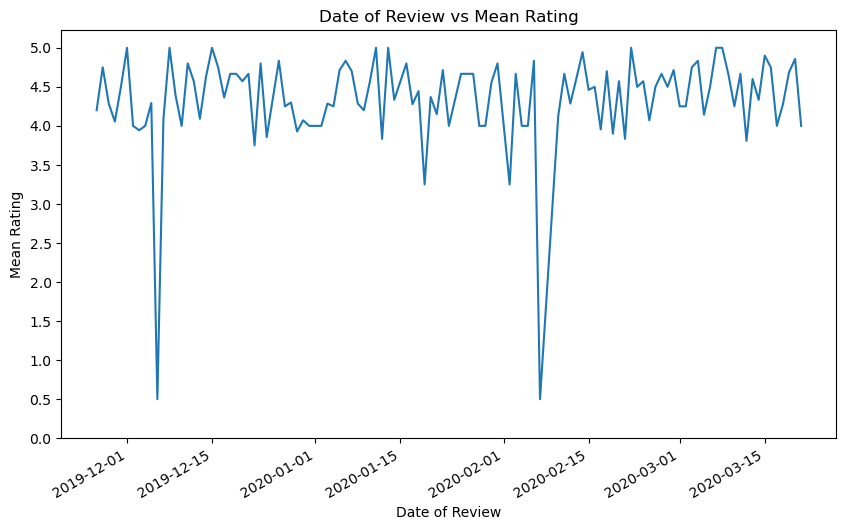

In [136]:
average_rating_by_date = df.groupby('date')["rating"].mean()
line_plot = average_rating_by_date.plot(kind="line", figsize=(10, 6))
line_plot.set_xlabel("Date of Review")
line_plot.set_ylabel("Mean Rating")
line_plot.set_title("Date of Review vs Mean Rating")
line_plot.set_yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

Tabel ini menunjukkan rata-rata rating tiap hari. Rating yang diberi cenderung tinggi di sekitar 4-5 namun ada beberapa hari dimana rating mencapai 0.5. 

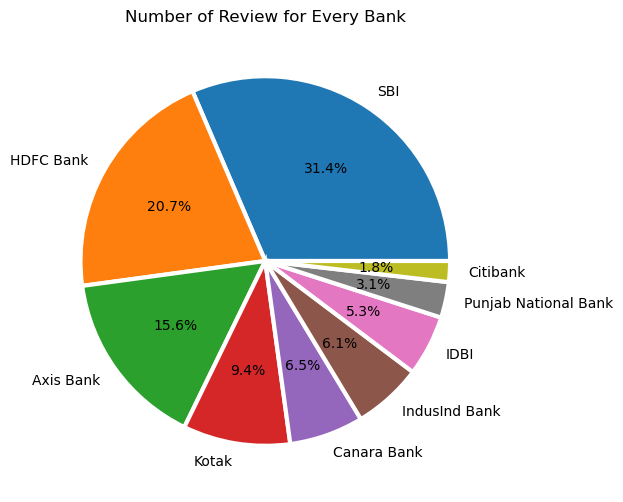

In [137]:
df.groupby("bank")["useful_count"].sum().sort_values(ascending = False).plot(kind = "pie", title = "Number of Review for Every Bank", wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, autopct='%.1f%%', ylabel = "", figsize = (6, 6))
plt.show()

Pie chart ini menunjukkan persentase review yang diterima oleh tiap bank dari total review yang diberi. SBI mendapatkan jumlah review tertinggi dibanding dengan yang lain, sekitar 31.4% dari total review.

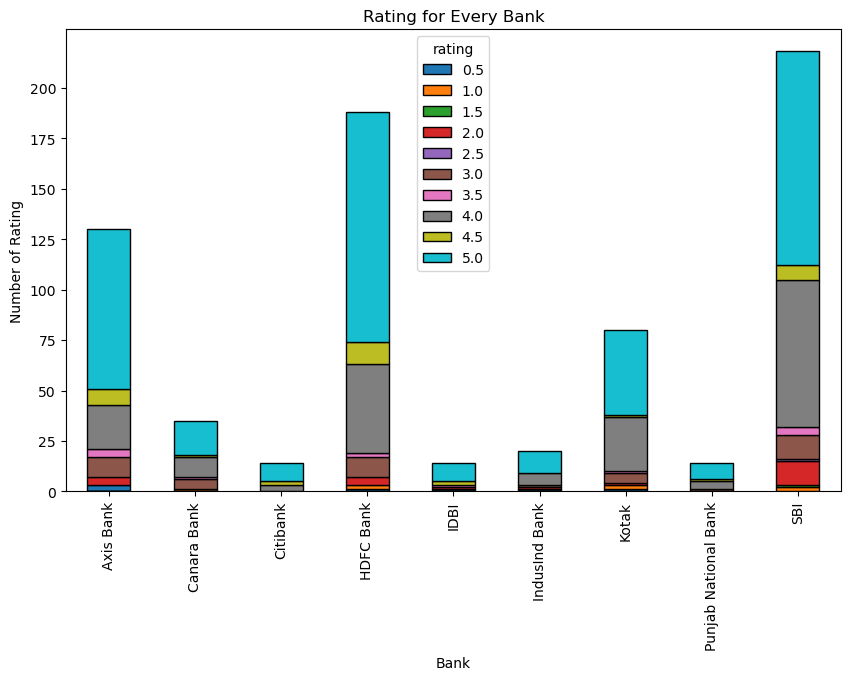

In [138]:
grouped_df = df.groupby(["bank", "rating"]).size().unstack()
bar_plot = grouped_df.plot(kind="bar", stacked=True, edgecolor="black", figsize=(10, 6))
bar_plot.set_xlabel("Bank")
bar_plot.set_ylabel("Number of Rating")
bar_plot.set_title("Rating for Every Bank")
bar_plot.set_yticks([i for i in range(0, int(grouped_df.sum(axis=1).max()) + 1, 25)])
plt.xticks(rotation=90)
plt.show()

Ini menunjukkan jumlah dari tiap rating yang diterima oleh tiap bank dalam suatu stacked bar chart.

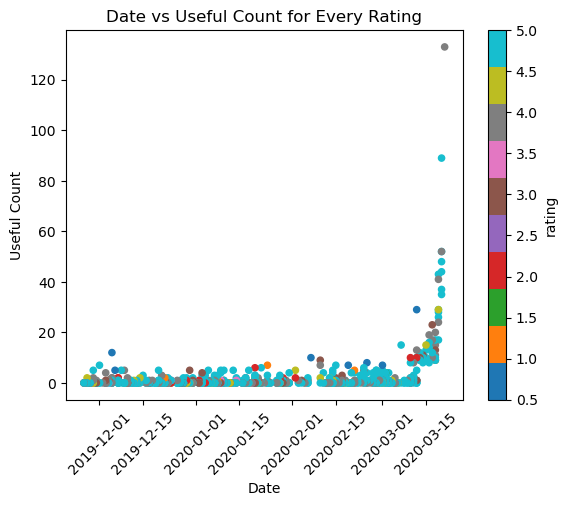

In [139]:
scatter_plot = df.plot(kind='scatter', x='date', y='useful_count', c='rating', colormap='tab10', colorbar=True)
scatter_plot.set_xlabel("Date")
scatter_plot.set_ylabel("Useful Count")
scatter_plot.set_title("Date vs Useful Count for Every Rating")
plt.xticks(rotation=45)
plt.show()

Ini menunjukkan rating yang diberikan tiap hari dan jumlah useful count yang diterima rating tersebut.

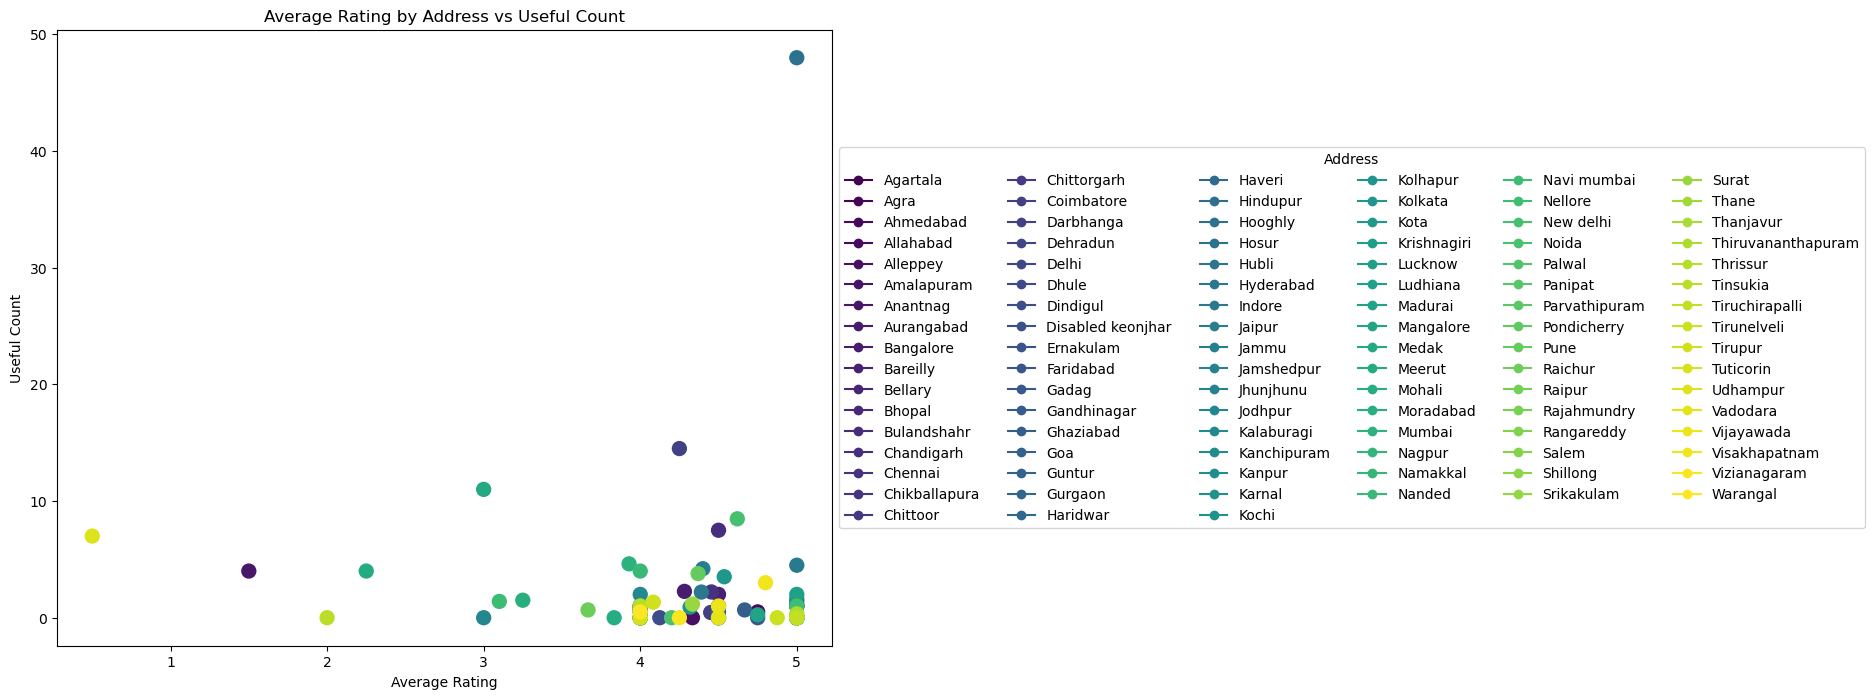

In [140]:
avg_rating_by_address = df.groupby('address')['rating'].mean().reset_index()
avg_useful_count_by_address = df.groupby('address')['useful_count'].mean().reset_index()
plt.figure(figsize=(10, 8))
scatter = plt.scatter(avg_rating_by_address['rating'], avg_useful_count_by_address['useful_count'],c=avg_rating_by_address['address'].astype('category').cat.codes, cmap='viridis',s=100)
legend_labels = avg_rating_by_address['address'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color=scatter.to_rgba(code)) for code in avg_rating_by_address['address'].astype('category').cat.codes]
plt.legend(legend_handles, legend_labels, title='Address', loc='center left', bbox_to_anchor=(1, 0.5), ncol=6)
plt.title('Average Rating by Address vs Useful Count')
plt.xlabel('Average Rating')
plt.ylabel('Useful Count')
plt.show()

Grafik ini menunjukkan rating rata-rata yang diterima tiap daerah dan useful countnya

In [141]:
df["rating"].corr(df["useful_count"])

-0.03261055338211511

Karena korelasi mendekati 0, artinya data "rating" dan data "useful_count" tidak berkolerasi.

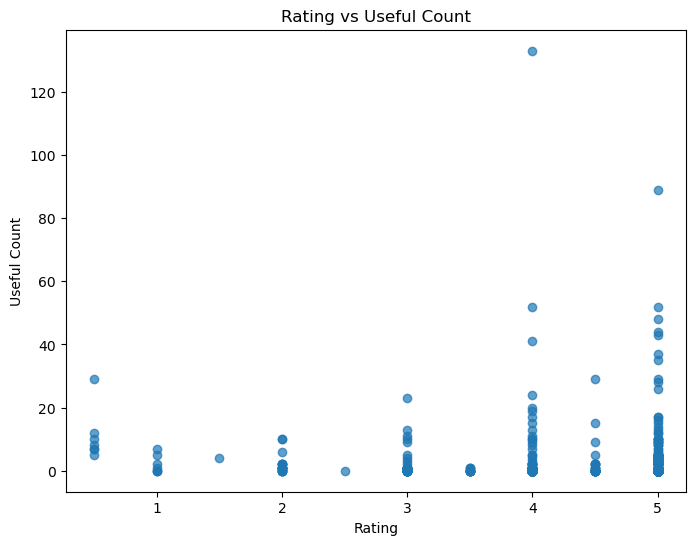

In [142]:
plt.figure(figsize=(8, 6))
plt.scatter(df['rating'], df['useful_count'], alpha=0.7)
plt.title('Rating vs Useful Count')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.show()